In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:

data=input_data.read_data_sets("data/MNIST/",one_hot=True)
# read_data_sets bydefault divides the data into train, validation and test set where validation takes 5000 samples

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [57]:
# data.train.labels

In [5]:
print("Size of")
print("Training set",data.train.labels.shape)
print("Test set",data.test.labels.shape)
print("Validation set",data.validation.labels.shape)


Size of
Training set (55000, 10)
Test set (10000, 10)
Validation set (5000, 10)


In [59]:
data.test.labels[0:5,]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
data.test.cls=np.array([label.argmax() for label in data.test.labels])

In [8]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [9]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [78]:
import numpy as np

a = np.array([[2,3],
              [4,5],
              [6,7]])

for i,ax in enumerate(a.flat):
    print(i,ax)

0 2
1 3
2 4
3 5
4 6
5 7


In [91]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
#     print(fig)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [97]:
# Get the first images from the test-set.
images = data.test.images[0:9]
# images[0]

In [93]:
images.shape#(9 numbers represented by 784 pixels ) i.e 28*28 pixel

(9, 784)

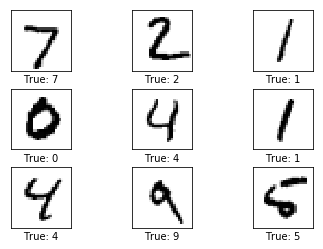

In [98]:
# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [14]:
# The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently
# as it knows the entire graph properly.

In [99]:
# A TensorFlow graph consists of the following parts which will be detailed below:

# 1.# Placeholder variables used to change the input to the graph.
# 2.# Model variables that are going to be optimized so as to make the model perform better.
# 3.# The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
# 4.# A cost measure that can be used to guide the optimization of the variables.
# 5.# An optimization method which updates the variables of the model.
# 6.# In addition, the TensorFlow graph may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard, 

# Placeholder variables
## Input given

In [100]:
# 1.# Placeholder variables used to change the input to the graph.

In [16]:
x=tf.placeholder(tf.float32,[None,img_size_flat])
# Placeholder helps to define input that is  image input, which means we can change each time during execution of graph
# This placeholder is also called as  a tensor which means we can fit a multi-dimensional vector or images.
# dtype=float 32 and shape is [None,img_size_flat] . None means it can hold any number of images
# For each row we wanted to hold a image which has been flattened to img_size_flat vector

In [17]:
y_true=tf.placeholder(tf.float32,[None,num_classes])
# It can be arbitrary number of of labels and each label would be a vector of length num_classes which is 10 in this case
# This one is in one-hot encoding format

In [18]:
y_true_cls=tf.placeholder(tf.int64,[None])
#  1 dimensional array having integer number

# Variables to be optimized

In [101]:
# 2.# Model variables that are going to be optimized so as to make the model perform better.

In [19]:
# These are more like variables that we use in normal programming but it has a different way to represent those in tensorflow

In [20]:
weights=tf.Variable(tf.zeros([img_size_flat,num_classes]))

In [21]:
biases=tf.Variable(tf.zeros([num_classes]))

In [22]:
# Most important-Nothing is initialized or calculated at this point of time. We are just building up the 
# computation graph
# Later we will start executing it.


# Model

In [102]:
# 3.# The model which is essentially just a mathematical function that calculates some output given the input in the 
# placeholder variables and the model variables.

In [23]:
logits=tf.matmul(x,weights)+biases
# Here logits will have [num_images,num_classes]

In [24]:
# Logits are the estimates but each estimate may be very large or small so to interpret it we need to normalize it 
# and show it in form
# of probabilities. Hence softmax

In [25]:
y_pred=tf.nn.softmax(logits)
# For each image it will give us a vector of 10 number (one hot encoding type)

In [104]:
y_pred_cls=tf.arg_max(y_pred,dimension=1)
# For each image it will return the index number of the largest element in each row

In [27]:
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
# What this cross-entropy does is , it checks the performance of the model by comparing the output(prdiction) vs true
# labels.cross_entropy of a function is generally positive. The goal is to minimize the cross_entropy to zero
# by updating the values of weights and biases.
#Note-Here we are using logits and not the output of softmax as in this fucntion softmax is also calculated along with
# cross_entropy

In [28]:
# Cross entropy is like loss function .Cross entropy output we have now for each image,So it shows the measure of how well 
# the model performs oneach image individually. But for optimizing the model we need a single scalar value
# hence we take the average of all the crossentropy function which is Cost Function
# To calculate the Cost function use
cost=tf.reduce_mean(cross_entropy)

# Optimization Method

In [29]:
# For optimizing we are using gradient descent method with learning rate=0.5
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# Performance measures

In [30]:
correct_prediction=tf.equal(y_pred_cls,y_true_cls)


In [31]:
#False becomes 0 and true becomes 1
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

############## Untill this step Graph has been created ###############################3

# Tensorflow Execution

In [32]:
# First create a tensorflow session
session=tf.Session()

# Initialize variables that are the weights and biases

In [33]:
session.run(tf.global_variables_initializer())
# Triggers an Op that initializes global variables.

In [34]:
# To save some computation time we will use Mini-Batch gradient descent
batch_size=100

In [35]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

# Helper-functions to show performance¶
### Dict with the test-set data to be used as input to the TensorFlow graph. Note that we must use the correct names for the placeholder variables in the TensorFlow graph.

In [36]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [37]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [38]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [39]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [40]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [41]:
print_accuracy()

Accuracy on test-set: 9.8%


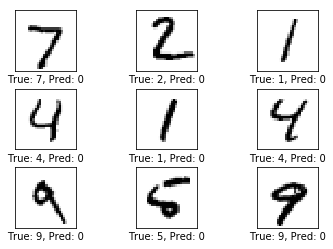

In [42]:
plot_example_errors()

In [43]:
optimize(num_iterations=1)

In [44]:
print_accuracy()

Accuracy on test-set: 32.6%


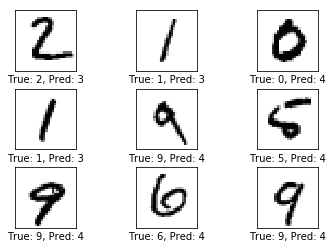

In [45]:
plot_example_errors()

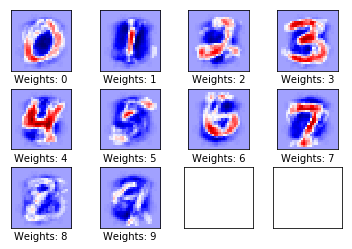

In [46]:
plot_weights()

In [47]:
optimize(num_iterations=9)

Accuracy on test-set: 72.5%


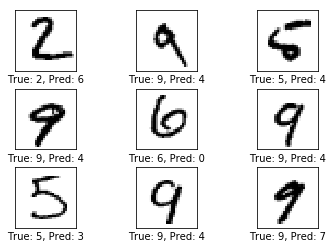

In [48]:
print_accuracy()

plot_example_errors()

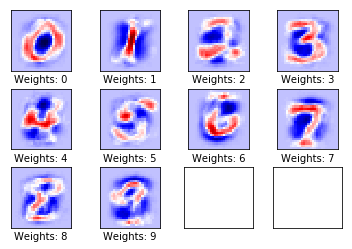

In [49]:
plot_weights()

Accuracy on test-set: 91.8%


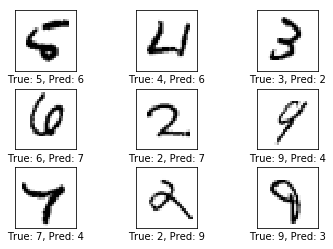

In [50]:
optimize(num_iterations=990)
print_accuracy()

plot_example_errors()

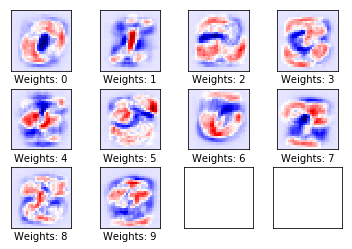

In [51]:
plot_weights()

[[ 961    0    1    3    0    8    4    1    2    0]
 [   0 1103    2    2    0    3    4    1   20    0]
 [  10    7  911   10   16    4   11   15   43    5]
 [   3    1   23  892    0   48    1   15   19    8]
 [   1    1    3    1  916    2   10    2   11   35]
 [  10    2    4   20    7  803   11    5   24    6]
 [  13    3    5    2   17   26  885    3    4    0]
 [   3    8   19    7    8    2    0  944    3   34]
 [   8    5    6   16    8   39    8   12  865    7]
 [  11    6    2    9   37   15    0   27    7  895]]


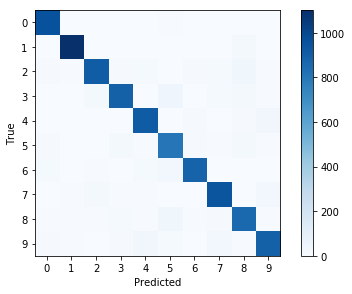

In [52]:
print_confusion_matrix()